In [ ]:
from qiskit import *
from qiskit.tools.visualization import plot_histogram
from math import sqrt, pi
%matplotlib inline

C:\Users\amaur\.conda\envs\qiskit\lib\site-packages\qiskit\circuit\register.py:119: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if not isinstance(key, (int, np.int, np.int32, np.int64, slice, list)):
C:\Users\amaur\.conda\envs\qiskit\lib\site-packages\qiskit\circuit\register.py:119: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the pre

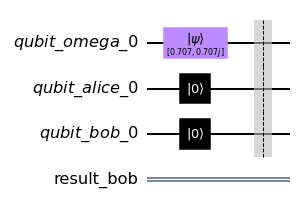

In [2]:
#Circuit creation and initialisation
qr_state = QuantumRegister(1, name='qubit_omega')
qr_alice = QuantumRegister(1, name='qubit_alice')
qr_bob = QuantumRegister(1, name='qubit_bob')
cr_bob = ClassicalRegister(1, name='result_bob')
circuit = QuantumCircuit(qr_state, qr_alice, qr_bob, cr_bob)

initial_state = [1/sqrt(2), 1j/sqrt(2)]
circuit.initialize(initial_state, 0)
circuit.reset(1)
circuit.reset(2)
circuit.barrier()

circuit.draw(output='mpl')

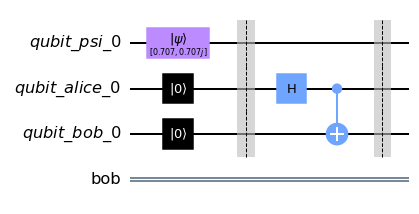

In [43]:
#Entanglement of Alice's and Bob's qubit
circuit.h(1)
circuit.cx(1,2)
circuit.barrier()
circuit.draw(output='mpl')

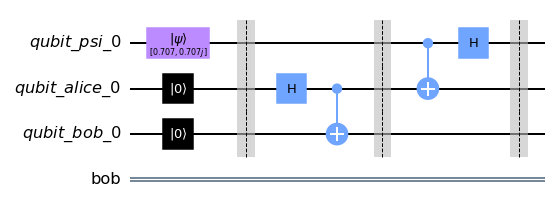

In [44]:
#Teleportation protocol in the computational basis
circuit.cx(0,1)
circuit.h(0)
circuit.barrier()
circuit.draw(output='mpl')

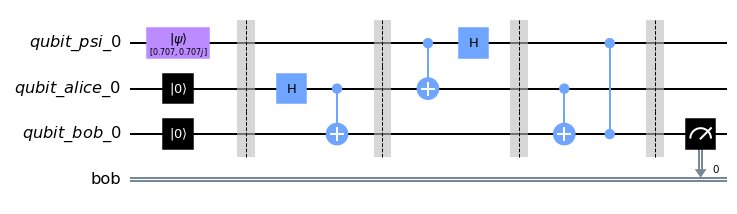

In [45]:
#Transmission of information to Bob
circuit.cx(1,2)
circuit.cz(0,2)
circuit.barrier()
circuit.measure(2,0)
circuit.draw(output='mpl')

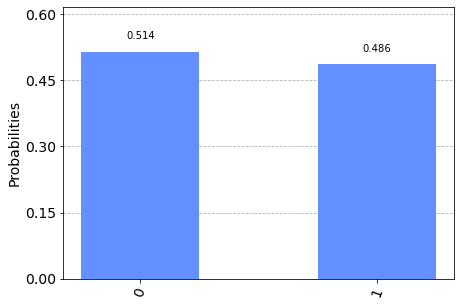

In [46]:
#Circuit execution
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend = simulator, shots = 1024).result()
counts = result.get_counts()
plot_histogram(counts)